# Page Rank
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eastspring-investments/herauni/blob/main/notebooks/page_rank.ipynb)

## Google Colab Settings

In [ ]:
try:
  import google.colab
  COLAB = True
except:
  COLAB = False


if COLAB:
    ! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
    ! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
    ! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
    import sys
    sys.path.append('/usr/local/lib/python3.7/site-packages/')

    ! conda install -c conda-forge networkx -y

## Imports

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import operator

## Eigenvector Centrality

### Conceptual Idea
- Let's say we have a small company called **VERY SMALL INC.** that has 100 customers and they have accounts receivable from all of them.
- Let's say we have a big company called **VERY BIG BIG INC.** that has 100 customers and they have accounts receivable from all of them.
    - How do we capture algorithmically that the big company is indeed more important than the smaller company?
    - Using a basic network, and having each company with an importance value, we can gauge a company's important by observing how the company's importance is proportional to all the importances of the company's customers
- This is eigenvector centrality!
    - Each company's centrality is the sum of its neighbours centrality


### Calculating
- Get eigenvectors and eigenvalues from adjacency matrix
- Take associated eigenvector from largest eigenvalue
- Normalised it and that is the importance vector

In [2]:
# Undirected Adjacency Matrix
adj_mat = np.asarray([
    [0, 0, 1, 1],
    [0, 0, 1, 1],
    [1, 1, 0, 1],
    [1, 1, 1, 0],
])

In [3]:
# Check symmetry
adj_mat == np.transpose(adj_mat)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

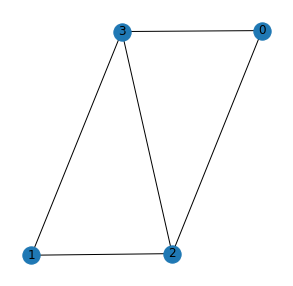

In [4]:
# Plot undirected adjacency matrix
g = nx.from_numpy_matrix(adj_mat)
pos = nx.spring_layout(g, seed=1)

plt.subplots(figsize=(5, 5))
plt.axis('off')
nx.draw(g, pos, with_labels=True)
plt.show()

In [5]:
# Norm of adjacency matrix
norm_adj_mat = np.sum(adj_mat, axis=1).reshape(-1, 1)
# Create the stochastic matrix by dividing by the norm
stoch_mat = adj_mat / norm_adj_mat

print("Stochastic matrix")
print(stoch_mat)

Stochastic matrix
[[0.         0.         0.5        0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.         0.33333333]
 [0.33333333 0.33333333 0.33333333 0.        ]]


In [6]:
# Get eigenvalues and associated eigenvalues

# Adjacency matrix is symmetric hence we can use .eigh which works
# for complex Hermitian matrix or real symmetric matrix.
eigen_val, eigen_vec = np.linalg.eigh(stoch_mat)

# Get largest eigenvalues and associated index
max_index, max_value = max(enumerate(eigen_val), key=operator.itemgetter(1))

# Since the adjacency matrix must be a square matrix,
# the eigenvalue and vector will not be complex
print("Largest eigenvalue:", max_value)
print("Largest eigenvector:", eigen_vec[:, max_index])

Largest eigenvalue: 0.8538509376029435
Largest eigenvector: [0.43516215 0.43516215 0.55734541 0.55734541]


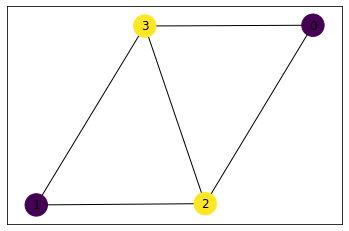

In [7]:
nx.draw_networkx(g, pos=pos, node_color=list(eigen_vec[:, max_index]), node_size=500)

## Page Rank with Eigendecomposition
- From the Perron-Frobenius theorem, as the matrix M is positive and column stochastic, the following statements hold.
    - M has an eigenvalue 1 of multiplicity one.
    - 1 is the largest eigenvalue: all the other eigenvalues have absolute values smaller than 1.
    - For the eigenvalue 1, there exists a unique eigenvector with the sum of its entries equal to 1.

In [8]:
# Directed Adjacency Matrix
adj_mat = np.asarray([
    [0, 1, 0, 0, 0],
    [1, 0, 0, 0, 1],
    [0, 1, 0, 0, 1],
    [0, 1, 0, 0, 1],
    [0, 1, 1, 1, 0]
])

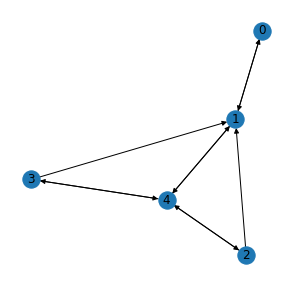

In [9]:
# Plot directed adjacency matrix
g = nx.from_numpy_matrix(adj_mat, create_using=nx.DiGraph)
pos = nx.spring_layout(g, seed=1)

plt.subplots(figsize=(5, 5))
plt.axis('off')
nx.draw(g, pos, with_labels=True)
plt.show()

In [10]:
# Norm of adjacency matrix
norm_adj_mat = np.sum(adj_mat, axis=1).reshape(-1, 1)
# Create the stochastic matrix by dividing by the norm
stoch_mat = adj_mat / norm_adj_mat

print("Stochastic matrix")
print(stoch_mat)

Stochastic matrix
[[0.         1.         0.         0.         0.        ]
 [0.5        0.         0.         0.         0.5       ]
 [0.         0.5        0.         0.         0.5       ]
 [0.         0.5        0.         0.         0.5       ]
 [0.         0.33333333 0.33333333 0.33333333 0.        ]]


In [11]:
# Transposed stochastic matrix
stoch_mat_transpose = np.transpose(stoch_mat)
print("Transposed stochastic matrix")
print(stoch_mat_transpose)

Transposed stochastic matrix
[[0.         0.5        0.         0.         0.        ]
 [1.         0.         0.5        0.5        0.33333333]
 [0.         0.         0.         0.         0.33333333]
 [0.         0.         0.         0.         0.33333333]
 [0.         0.5        0.5        0.5        0.        ]]


In [12]:
# Get eigenvalues and associated eigenvectors
# Cannot use .eigsh as adjacency matrix is not necessarily symmetric
eigen_val, eigen_vec = np.linalg.eig(stoch_mat_transpose)

In [13]:
# Get eigenvector
v = eigen_vec[:, abs(eigen_val-1) < 1.e-10]
print(np.real(v))

# Get page rank: probability distribution
r = v / v.sum()
print('-'*5)
print(np.real(r))
print('-'*5)

[[-0.3592106 ]
 [-0.71842121]
 [-0.1796053 ]
 [-0.1796053 ]
 [-0.53881591]]
-----
[[0.18181818]
 [0.36363636]
 [0.09090909]
 [0.09090909]
 [0.27272727]]
-----


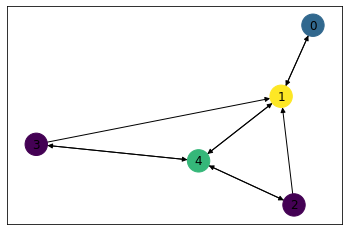

In [14]:
nx.draw_networkx(g, pos=pos, node_color=np.real(r), node_size=500)

In [15]:
# Compute pagerank centrality with networkx directly
centrality = nx.pagerank(g, alpha=1.0)
centrality

{0: 0.18181774385732596,
 1: 0.3636371288525558,
 2: 0.09090887716575069,
 3: 0.09090887716575069,
 4: 0.27272737295861604}

## Page Rank with Power Iteration

In [16]:
# Directed Adjacency Matrix
adj_mat = np.asarray([
    [0, 1, 0, 0, 0],
    [1, 0, 0, 0, 1],
    [0, 1, 0, 0, 1],
    [0, 1, 0, 0, 1],
    [0, 1, 1, 1, 0]
])

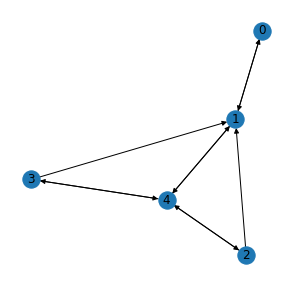

In [17]:
# Plot directed adjacency matrix
g = nx.from_numpy_matrix(adj_mat, create_using=nx.DiGraph)
pos = nx.spring_layout(g, seed=1)

plt.subplots(figsize=(5, 5))
plt.axis('off')
nx.draw(g, pos, with_labels=True)
plt.show()

In [18]:
# Norm of adjacency matrix
norm_adj_mat = np.sum(adj_mat, axis=1).reshape(-1, 1)
# Create the stochastic matrix by dividing by the norm
stoch_mat = adj_mat / norm_adj_mat

print("Stochastic matrix")
print(stoch_mat)

Stochastic matrix
[[0.         1.         0.         0.         0.        ]
 [0.5        0.         0.         0.         0.5       ]
 [0.         0.5        0.         0.         0.5       ]
 [0.         0.5        0.         0.         0.5       ]
 [0.         0.33333333 0.33333333 0.33333333 0.        ]]


In [19]:
# Transposed stochastic matrix
stoch_mat_transpose = np.transpose(stoch_mat)
print("Transposed stochastic matrix")
print(stoch_mat_transpose)

Transposed stochastic matrix
[[0.         0.5        0.         0.         0.        ]
 [1.         0.         0.5        0.5        0.33333333]
 [0.         0.         0.         0.         0.33333333]
 [0.         0.         0.         0.         0.33333333]
 [0.         0.5        0.5        0.5        0.        ]]


In [20]:
# Power iteration

# If you reduce the tolerance, you will get more similar 
# results to eigendecomposition method at the expense
# of more loops

r = np.random.rand(stoch_mat_transpose.shape[0])

tolerance = 1e-3
r_next = np.matmul(stoch_mat_transpose, r)

while (np.linalg.norm(r_next - r) > tolerance):
    r = np.matmul(stoch_mat_transpose, r)
    r_next = np.matmul(stoch_mat_transpose, r)

r = r / r.sum()

np.real(np.round(r, decimals=6))

array([0.18189 , 0.363544, 0.090843, 0.090843, 0.272879])

## Google Page Rank with Power Iteration
- Damping factor to ensure convergence

In [22]:
# Compute pagerank centrality with networkx directly
centrality = nx.pagerank(g, alpha=0.85)
centrality

{0: 0.17685715941894686,
 1: 0.345545563925808,
 2: 0.1055226523042404,
 3: 0.1055226523042404,
 4: 0.2665519720467644}